## ProNet Video scene recognition - Vanilla dataset reference evaluation


https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

Learning rate of 0.001 led to being stuck probably as not meeting optimal point. decreased to 0.0002. This also means we should repeat the other two notebooks with same rate

In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#set randomness for reproducibility
from numpy.random import seed
seed(8) #1
from tensorflow import set_random_seed
set_random_seed(7) #2

#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


#TRAINING SETS########################################


!gdown https://drive.google.com/uc?id=113wZqbMu7cmjciX9-x7SAx3xc2chBD0a
!unzip SeparatedTrain_Caltech.zip


Streaming output truncated to the last 5000 lines.
  inflating: SeparatedTrain/train60/Faces/image_0029_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0030_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0031_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0032_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0033_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0034_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0035_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0036_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0037_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0038_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0039_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0040_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0041_60percent.jpg  
  inflating: SeparatedTrain/train60/Faces/image_0042

In [2]:
print(os.listdir("/content/"))

#Print and remove zips once done

!rm SeparatedTrain_Caltech.zip


['.config', 'SeparatedTrain_Caltech.zip', 'SeparatedTrain', 'sample_data']
rm: cannot remove 'preprocessed_Caltech.zip': No such file or directory


In [3]:
from os import listdir
data_list = listdir('/content/SeparatedTrain/')

#Delete some classes that may interfere


data_list

['test', 'train20', 'train', 'train60', 'train40']

Resnet Initialization

In [24]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf


DATASET_PATH100  = '/content/SeparatedTrain/train'
DATASET_PATH20  = '/content/SeparatedTrain/train20'
DATASET_PATH40  = '/content/SeparatedTrain/train40'
DATASET_PATH60  = '/content/SeparatedTrain/train60'

test_dir =  '/content/SeparatedTrain/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 25  # try reducing batch size or freeze more layers if your GPU runs out of memory
FREEZE_LAYERS = 25  # freeze the first this many layers for training
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0002
#5e-5 #Slow learn rate as we are transfer training
DROP_OUT = .5



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches100 = train_datagen.flow_from_directory(DATASET_PATH100,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )

valid_batches100 = train_datagen.flow_from_directory(DATASET_PATH100,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )


train_batches20 = train_datagen.flow_from_directory(DATASET_PATH20,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )

valid_batches20 = train_datagen.flow_from_directory(DATASET_PATH20,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )

train_batches40 = train_datagen.flow_from_directory(DATASET_PATH40,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )

valid_batches40 = train_datagen.flow_from_directory(DATASET_PATH40,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )
train_batches60 = train_datagen.flow_from_directory(DATASET_PATH60,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"
                                                  )

valid_batches60 = train_datagen.flow_from_directory(DATASET_PATH60,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"
                                                 
                                                  )


#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 6540 images belonging to 102 classes.
Found 1584 images belonging to 102 classes.
Found 6540 images belonging to 102 classes.
Found 1584 images belonging to 102 classes.
Found 6540 images belonging to 102 classes.
Found 1584 images belonging to 102 classes.
Found 6540 images belonging to 102 classes.
Found 1584 images belonging to 102 classes.


Layer Modification at upper layer of Resnet

In [0]:
#Simple CNN model

from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])


In [26]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 102)               26214     
Total params: 16,838,310
Trainable params: 2,123,622
Non-trainable params: 14,714,688
_________________________________________________________________
None


Training

In [27]:
#FIT MODEL 20%
print(len(train_batches20))
print(len(valid_batches20))


STEP_SIZE_TRAIN=train_batches20.n//train_batches20.batch_size
STEP_SIZE_VALID=valid_batches20.n//valid_batches20.batch_size

result=model.fit_generator(train_batches20,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches20,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )



262
64
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


261/261 [==============================] - 45s 174ms/step - loss: 7.7608 - acc: 0.3102 - val_loss: 3.5840 - val_acc: 0.3219
Epoch 2/10
261/261 [==============================] - 45s 172ms/step - loss: 3.0696 - acc: 0.3922 - val_loss: 2.8718 - val_acc: 0.4086
Epoch 3/10
261/261 [==============================] - 46s 175ms/step - loss: 2.6293 - acc: 0.4579 - val_loss: 2.6784 - val_acc: 0.4426
Epoch 4/10
261/261 [==============================] - 44s 169ms/step - loss: 2.4236 - acc: 0.4981 - val_loss: 2.4250 - val_acc: 0.4945
Epoch 5/10
261/261 [==============================] - 45s 173ms/step - loss: 2.1877 - acc: 0.5317 - val_loss: 2.3791 - val_acc: 0.5061
Epoch 6/10
261/261 [==============================] - 44s 170ms/step - loss: 2.0429 - acc: 0.5574 - val_loss: 2.2677 - val_acc: 0.5247
Epoch 7/10
261/261 [==============================] - 44s 170ms/step - loss: 1.8793 - acc: 0.5897 - val_loss: 2.1534 - val_acc: 0.5516
Epoch 8/10
261/261 [==============================] - 45s 171ms/st

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


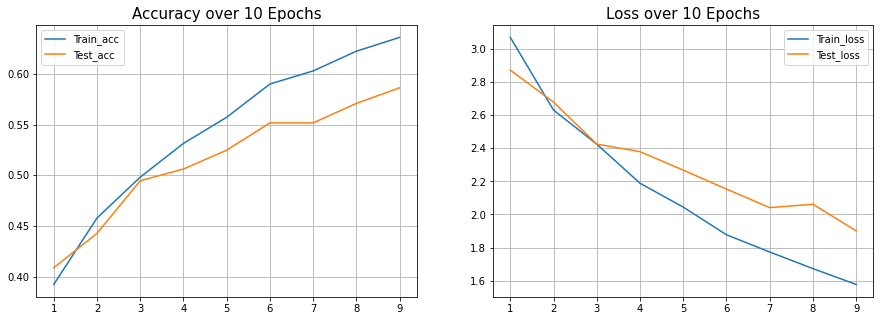

In [28]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 10)

In [0]:
#net_final.save('vanilla_model_100epochs_0pt0005.h5')

In [30]:
#Evaluating the validation set separately. NOT TEST SET
# save trained weights
# net_final.save(WEIGHTS_FINAL)
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=True,
        seed=42,
        
        class_mode="categorical")
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = True,
                           verbose = 1
                           )


print('Test loss 20%:' , x[0])
print('Test accuracy 20%:',x[1])


Found 1020 images belonging to 102 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


41/41 [==============================] - 0s 6ms/step
Test loss 20%: 4.530101578410079
Test accuracy 20%: 0.0


262
64
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


261/261 [==============================] - 45s 172ms/step - loss: 1.5210 - acc: 0.6514 - val_loss: 1.7648 - val_acc: 0.6152
Epoch 2/10
261/261 [==============================] - 45s 171ms/step - loss: 1.3107 - acc: 0.6968 - val_loss: 1.8262 - val_acc: 0.6228
Epoch 3/10
261/261 [==============================] - 45s 172ms/step - loss: 1.1897 - acc: 0.7137 - val_loss: 1.7871 - val_acc: 0.6286
Epoch 4/10
261/261 [==============================] - 44s 169ms/step - loss: 1.1703 - acc: 0.7177 - val_loss: 1.6284 - val_acc: 0.6594
Epoch 5/10
261/261 [==============================] - 44s 170ms/step - loss: 1.0773 - acc: 0.7425 - val_loss: 1.5927 - val_acc: 0.6568
Epoch 6/10
261/261 [==============================] - 46s 174ms/step - loss: 0.9957 - acc: 0.7485 - val_loss: 1.6462 - val_acc: 0.6588
Epoch 7/10
261/261 [==============================] - 45s 171ms/step - loss: 0.9569 - acc: 0.7612 - val_loss: 1.6685 - val_acc: 0.6543
Epoch 8/10
261/261 [==============================] - 44s 169ms/st

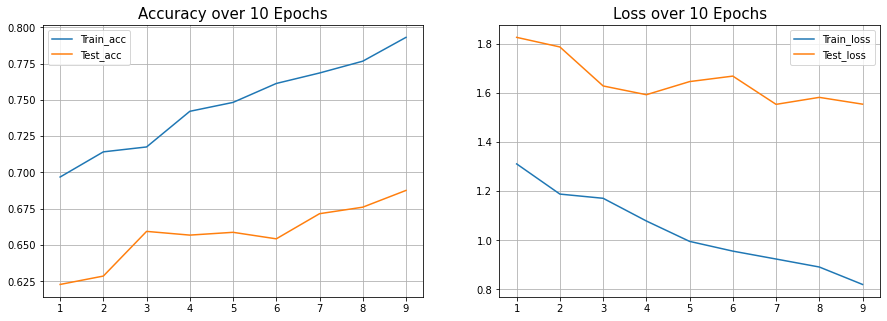

In [31]:
#FIT MODEL 40%
print(len(train_batches40))
print(len(valid_batches40))


STEP_SIZE_TRAIN=train_batches40.n//train_batches40.batch_size
STEP_SIZE_VALID=valid_batches40.n//valid_batches40.batch_size

result=model.fit_generator(train_batches40,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches40,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )

plot_acc_loss(result, 10)

In [32]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = True,
                           verbose = 1
                           )


print('Test loss 40%:' , x[0])
print('Test accuracy 40%:',x[1])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


41/41 [==============================] - 0s 7ms/step
Test loss 40%: 4.373639909232535
Test accuracy 40%: 0.04878048780487805


262
64
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


261/261 [==============================] - 45s 171ms/step - loss: 0.8432 - acc: 0.7915 - val_loss: 1.4750 - val_acc: 0.6933
Epoch 2/10
261/261 [==============================] - 45s 171ms/step - loss: 0.7882 - acc: 0.7976 - val_loss: 1.4821 - val_acc: 0.7056
Epoch 3/10
261/261 [==============================] - 45s 171ms/step - loss: 0.7607 - acc: 0.8021 - val_loss: 1.4841 - val_acc: 0.6998
Epoch 4/10
261/261 [==============================] - 45s 174ms/step - loss: 0.7247 - acc: 0.8098 - val_loss: 1.4600 - val_acc: 0.7152
Epoch 5/10
261/261 [==============================] - 45s 171ms/step - loss: 0.6992 - acc: 0.8160 - val_loss: 1.4566 - val_acc: 0.7152
Epoch 6/10
261/261 [==============================] - 44s 168ms/step - loss: 0.6726 - acc: 0.8192 - val_loss: 1.5200 - val_acc: 0.7037
Epoch 7/10
261/261 [==============================] - 45s 174ms/step - loss: 0.6881 - acc: 0.8217 - val_loss: 1.4003 - val_acc: 0.7203
Epoch 8/10
261/261 [==============================] - 45s 171ms/st

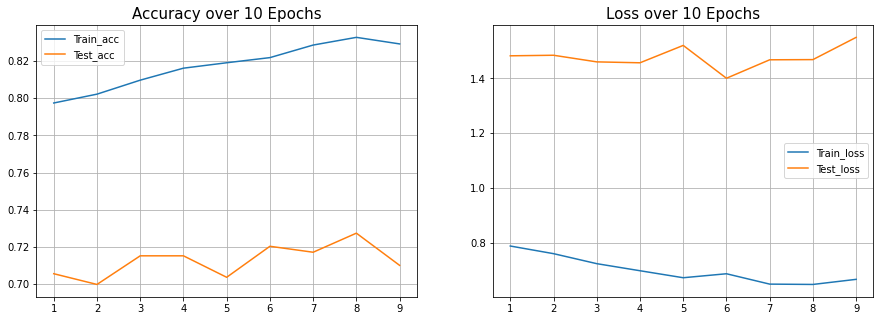

In [33]:
#FIT MODEL 60%
print(len(train_batches60))
print(len(valid_batches60))

STEP_SIZE_TRAIN=train_batches60.n//train_batches60.batch_size
STEP_SIZE_VALID=valid_batches60.n//valid_batches60.batch_size

result=model.fit_generator(train_batches60,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches60,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )

plot_acc_loss(result, 10)

In [34]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = True,
                           verbose = 1
                           )


print('Test loss 60%:' , x[0])
print('Test accuracy 60%:',x[1])

41/41 [==============================] - 0s 6ms/step
Test loss 60%: 4.315936734036701
Test accuracy 60%: 0.04878048780487805


262
64
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


261/261 [==============================] - 44s 170ms/step - loss: 0.6818 - acc: 0.8325 - val_loss: 1.4869 - val_acc: 0.7111
Epoch 2/10
261/261 [==============================] - 45s 171ms/step - loss: 0.6397 - acc: 0.8369 - val_loss: 1.3171 - val_acc: 0.7453
Epoch 3/10
261/261 [==============================] - 46s 177ms/step - loss: 0.6172 - acc: 0.8468 - val_loss: 1.6420 - val_acc: 0.7126
Epoch 4/10
261/261 [==============================] - 46s 175ms/step - loss: 0.6188 - acc: 0.8394 - val_loss: 1.5267 - val_acc: 0.7306
Epoch 5/10
261/261 [==============================] - 46s 176ms/step - loss: 0.5687 - acc: 0.8498 - val_loss: 1.5147 - val_acc: 0.7280
Epoch 6/10
261/261 [==============================] - 46s 176ms/step - loss: 0.5918 - acc: 0.8466 - val_loss: 1.6843 - val_acc: 0.7004
Epoch 7/10
261/261 [==============================] - 45s 171ms/step - loss: 0.5411 - acc: 0.8568 - val_loss: 1.5299 - val_acc: 0.7223
Epoch 8/10
261/261 [==============================] - 45s 171ms/st

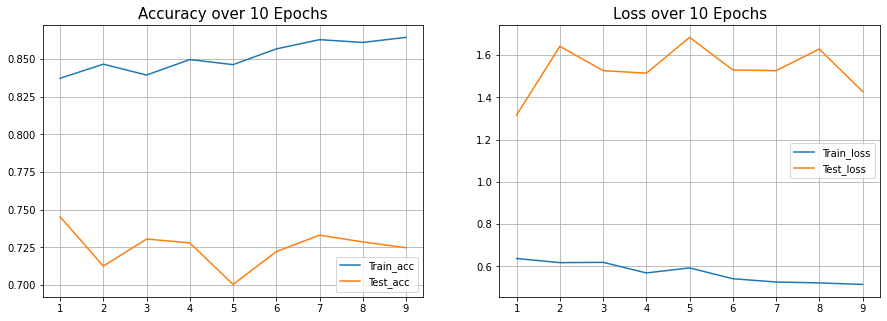

In [35]:
#FIT MODEL 100%
print(len(train_batches100))
print(len(valid_batches100))

STEP_SIZE_TRAIN=train_batches100.n//train_batches100.batch_size
STEP_SIZE_VALID=valid_batches100.n//valid_batches100.batch_size

result=model.fit_generator(train_batches100,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches100,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )

plot_acc_loss(result, 10)

In [41]:

eval_generator.reset()  
n = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = True,
                           verbose = 1
                           )


print('Test loss 100%:' , n[0])
print('Test accuracy 100%:',n[1])

41/41 [==============================] - 0s 7ms/step
Test loss 100%: 4.243438924231181
Test accuracy 100%: 0.04878048780487805


Predict

In [37]:

#Dont forget shuffle false
#See https://github.com/keras-team/keras/issues/6499
"""
  
pred = net_final.predict_generator(eval_generator,verbose=1)
print("Predictions finished")


#Map the predictions to the training classes
#First, take max prediction class
predicted_class_indices=np.argmax(pred,axis=1)

#Map it to train generataor
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
"""

'\n  \npred = net_final.predict_generator(eval_generator,verbose=1)\nprint("Predictions finished")\n\n\n#Map the predictions to the training classes\n#First, take max prediction class\npredicted_class_indices=np.argmax(pred,axis=1)\n\n#Map it to train generataor\nlabels = (train_batches.class_indices)\nlabels = dict((v,k) for k,v in labels.items())\npredictions = [labels[k] for k in predicted_class_indices]\n'

In [0]:
model.save('Staggered_proNet.h5')


Save

In [39]:
#Save results

filenames=eval_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("ProNet_CNN_30epochs_0pt0005_staggeredProcess.csv",index=False)

NameError: ignored